In [7]:
import seaborn as sns

a)

In [8]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


b)

In [9]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


c)

In [10]:
mpg[mpg.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select the features and target variable
features = ['cylinders', 'displacement', 'weight', 'acceleration']
target = 'horsepower'

# Split the data into training and testing sets
train_data = mpg[mpg[target].notna()]
test_data = mpg[mpg[target].isna()]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the missing values
predicted_horsepower = model.predict(X_test)

# Fill the missing values in the original dataframe
mpg.loc[mpg[target].isna(), target] = predicted_horsepower

print("Missing values for horsepower have been predicted and filled.")

Missing values for horsepower have been predicted and filled.


Original Horsepower Stats:
 count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64
Predicted Horsepower Stats:
 count     6.000000
mean     80.573333
std      15.394301
min      59.800000
25%      69.335000
50%      86.000000
75%      87.425000
max      99.960000
dtype: float64


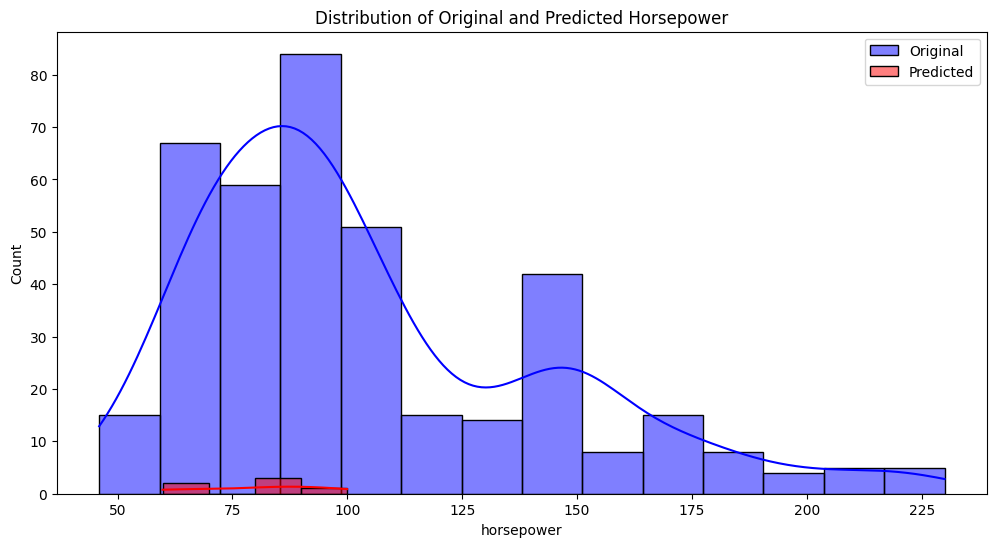

ValueError: could not convert string to float: 'usa'

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compare summary statistics
original_stats = train_data[target].describe()
predicted_stats = pd.Series(predicted_horsepower).describe()

print("Original Horsepower Stats:\n", original_stats)
print("Predicted Horsepower Stats:\n", predicted_stats)

# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(train_data[target], kde=True, label='Original', color='blue')
sns.histplot(predicted_horsepower, kde=True, label='Predicted', color='red')
plt.legend()
plt.title('Distribution of Original and Predicted Horsepower')
plt.show()

# Check correlations
original_corr = train_data.corr()[target]
predicted_corr = pd.concat([X_test, pd.Series(predicted_horsepower, name=target)], axis=1).corr()[target]

print("Original Correlations:\n", original_corr)
print("Predicted Correlations:\n", predicted_corr)

# Evaluate model performance
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Validation Mean Squared Error:", mse)

/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


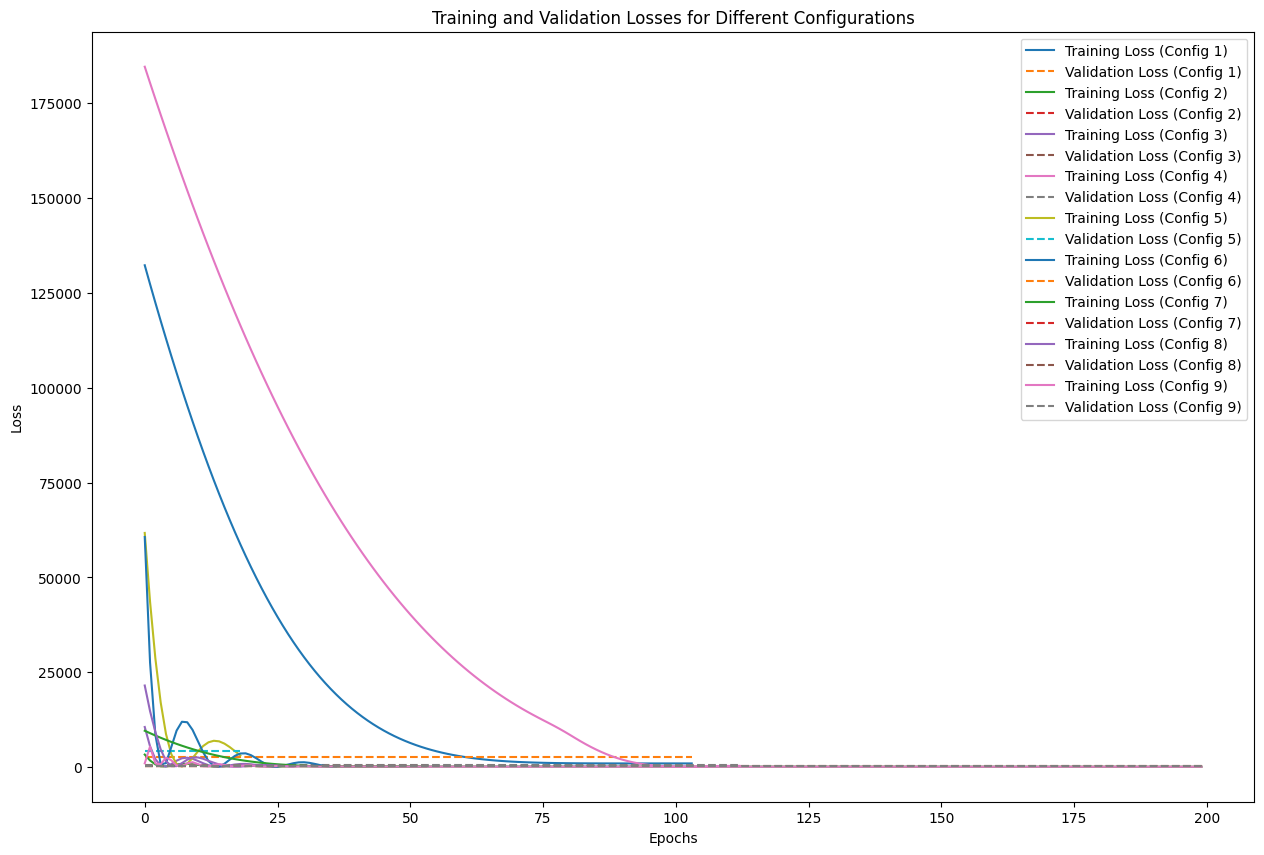

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the configurations to test
configurations = [
    (1, 10), (1, 50), (1, 100),
    (2, 10), (2, 50), (2, 100),
    (3, 10), (3, 50), (3, 100)
]

# Number of epochs
epochs = 200

# Store the losses for each configuration
training_losses = []
validation_losses = []

for layers, nodes in configurations:
    # Create the MLP model
    hidden_layer_sizes = tuple([nodes] * layers)
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=epochs, random_state=42)
    
    # Train the model
    mlp.fit(X_train, y_train)
    
    # Get the training and validation losses
    train_loss = mlp.loss_curve_
    val_loss = [mean_squared_error(y_val, mlp.predict(X_val))] * len(train_loss)
    
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

# Plot the training and validation losses
plt.figure(figsize=(15, 10))
for i, (train_loss, val_loss) in enumerate(zip(training_losses, validation_losses)):
    plt.plot(train_loss, label=f'Training Loss (Config {i+1})')
    plt.plot(val_loss, label=f'Validation Loss (Config {i+1})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Different Configurations')
plt.legend()
plt.show()

/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages

Early stopping at epoch 13 for configuration 1 layers and 50 nodes


/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages

Early stopping at epoch 116 for configuration 1 layers and 100 nodes


/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages

Early stopping at epoch 16 for configuration 2 layers and 50 nodes


/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages

Early stopping at epoch 81 for configuration 2 layers and 100 nodes


/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages

Early stopping at epoch 17 for configuration 3 layers and 50 nodes
Early stopping at epoch 24 for configuration 3 layers and 100 nodes


/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.12/site-packages

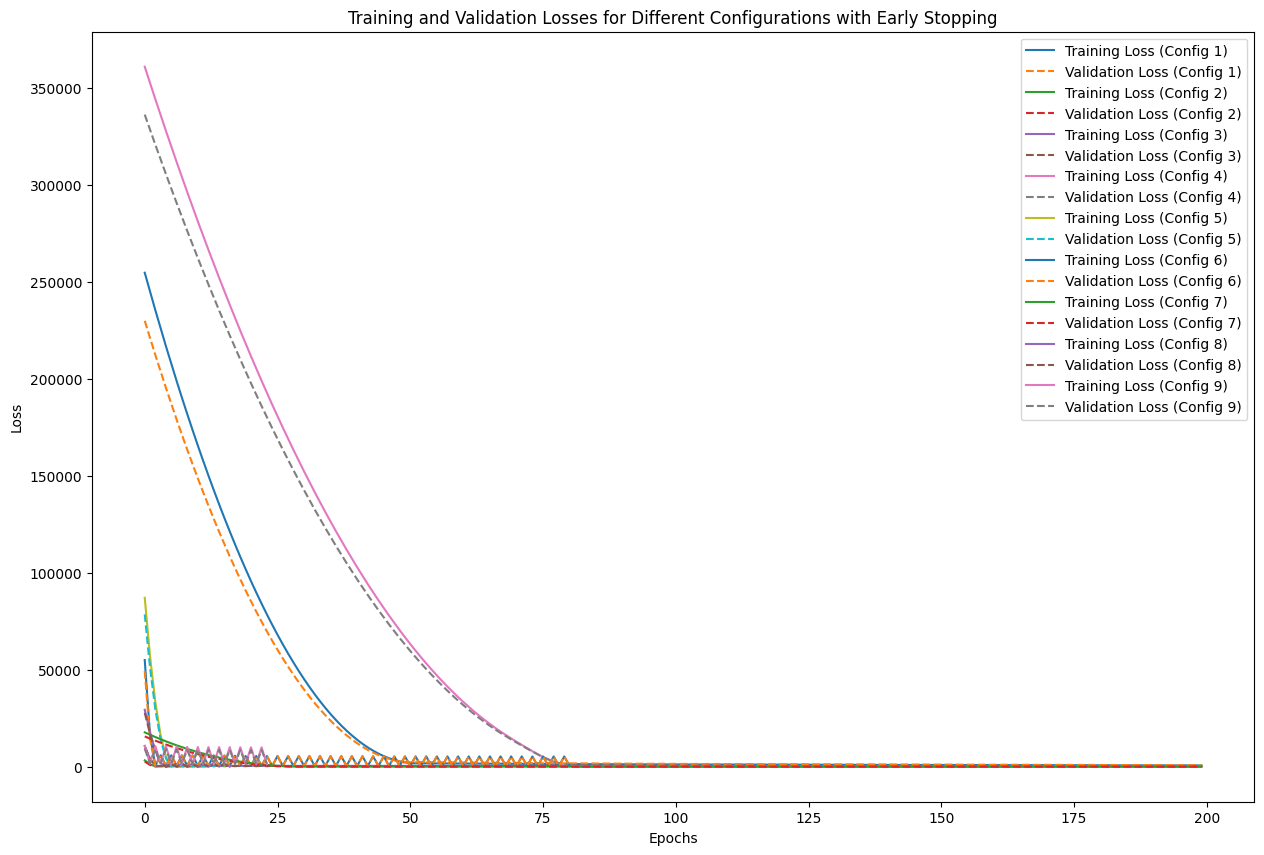

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Define the configurations to test
configurations = [
    (1, 10), (1, 50), (1, 100),
    (2, 10), (2, 50), (2, 100),
    (3, 10), (3, 50), (3, 100)
]

# Early stopping parameters
patience = 10
min_delta = 0.001

# Store the losses for each configuration
training_losses = []
validation_losses = []

for layers, nodes in configurations:
    # Create the MLP model
    hidden_layer_sizes = tuple([nodes] * layers)
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=1, warm_start=True, random_state=42)
    
    best_val_loss = float('inf')
    epochs_no_improve = 0
    train_loss = []
    val_loss = []
    
    for epoch in range(epochs):
        mlp.fit(X_train, y_train)
        
        # Get the training and validation losses
        train_loss.append(mean_squared_error(y_train, mlp.predict(X_train)))
        current_val_loss = mean_squared_error(y_val, mlp.predict(X_val))
        val_loss.append(current_val_loss)
        
        # Check for early stopping
        if current_val_loss < best_val_loss - min_delta:
            best_val_loss = current_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1} for configuration {layers} layers and {nodes} nodes")
            break
    
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

# Plot the training and validation losses
plt.figure(figsize=(15, 10))
for i, (train_loss, val_loss) in enumerate(zip(training_losses, validation_losses)):
    plt.plot(train_loss, label=f'Training Loss (Config {i+1})')
    plt.plot(val_loss, label=f'Validation Loss (Config {i+1})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Different Configurations with Early Stopping')
plt.legend()
plt.show()

In [20]:
# Combine training and validation data
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

# Train the model on the combined dataset
model.fit(X_combined, y_combined)

print("Model has been trained on all training and validation data.")

Model has been trained on all training and validation data.


Predicted Horsepower for Test Data:
                      name  predicted_horsepower
32             ford pinto                 65.22
126         ford maverick                 89.83
330  renault lecar deluxe                 60.70
336    ford mustang cobra                100.39
354           renault 18i                 87.65
374        amc concord dl                 74.49


/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_59082/3554915468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_horsepower'] = test_predictions


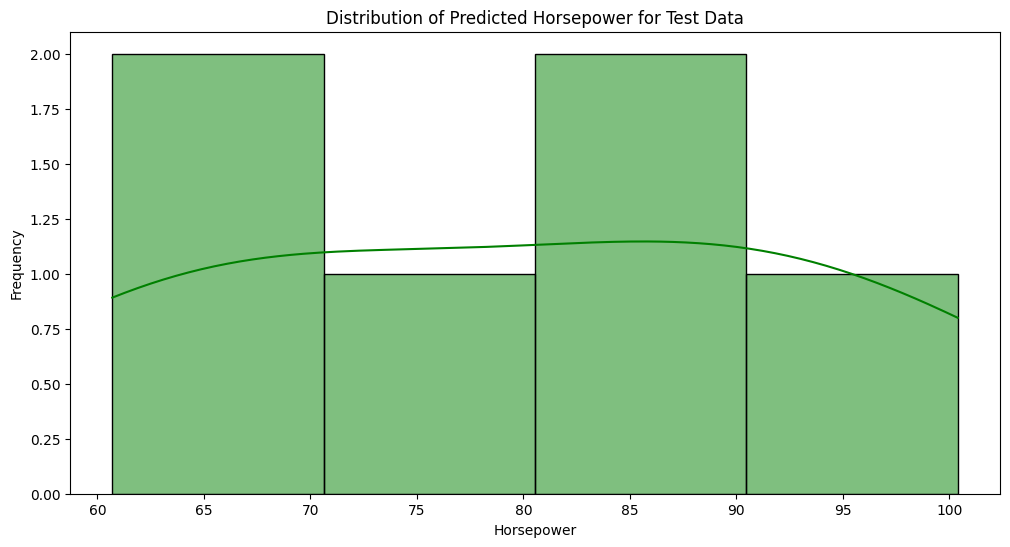

In [21]:
# Predict the horsepower for the test data
test_predictions = model.predict(X_test)

# Evaluate the predictions
test_data['predicted_horsepower'] = test_predictions

# Print the predicted values
print("Predicted Horsepower for Test Data:\n", test_data[['name', 'predicted_horsepower']])

# Since we don't have actual values for the test data, we can't calculate the error metrics
# But we can visualize the predicted values
plt.figure(figsize=(12, 6))
sns.histplot(test_predictions, kde=True, color='green')
plt.title('Distribution of Predicted Horsepower for Test Data')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

Predicted Horsepower for Test Data using kNN:
                      name  knn_predicted_horsepower
32             ford pinto                      62.0
126         ford maverick                     112.6
330  renault lecar deluxe                      63.0
336    ford mustang cobra                     104.8
354           renault 18i                      86.0
374        amc concord dl                      89.0


/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_59082/388632435.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['knn_predicted_horsepower'] = knn_test_predictions


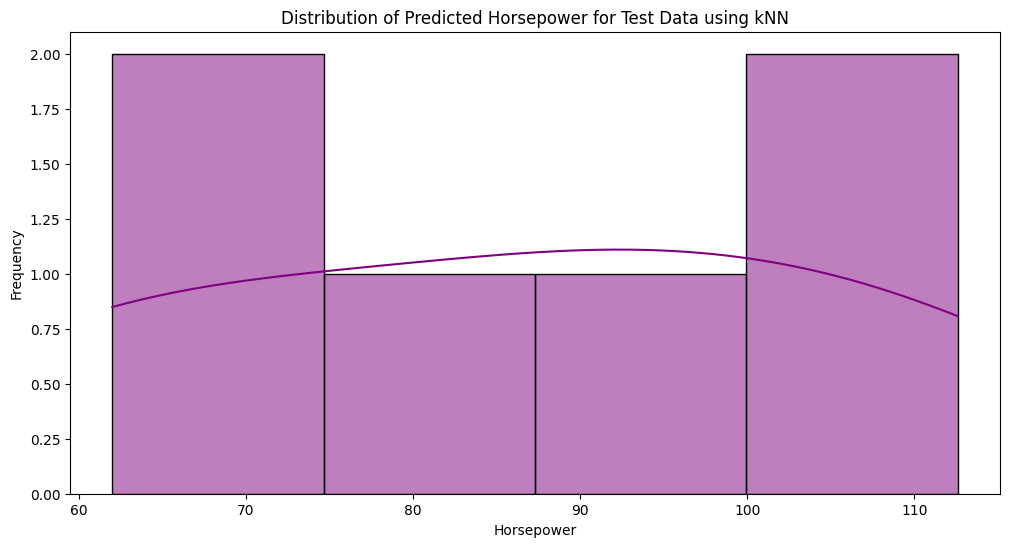

In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Create the kNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the combined dataset
knn_model.fit(X_combined, y_combined)

# Predict the horsepower for the test data
knn_test_predictions = knn_model.predict(X_test)

# Evaluate the predictions
test_data['knn_predicted_horsepower'] = knn_test_predictions

# Print the predicted values
print("Predicted Horsepower for Test Data using kNN:\n", test_data[['name', 'knn_predicted_horsepower']])

# Visualize the predicted values
plt.figure(figsize=(12, 6))
sns.histplot(knn_test_predictions, kde=True, color='purple')
plt.title('Distribution of Predicted Horsepower for Test Data using kNN')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Create the kNN model
knn = KNeighborsRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_combined, y_combined)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best negative mean squared error: ", best_score)

Best parameters found:  {'n_neighbors': 7}
Best negative mean squared error:  -242.39005102040818


Predicted Horsepower for Test Data using kNN with 7 neighbors:
                      name  knn_predicted_horsepower_7
32             ford pinto                   64.714286
126         ford maverick                  105.428571
330  renault lecar deluxe                   60.142857
336    ford mustang cobra                   98.285714
354           renault 18i                   85.571429
374        amc concord dl                   87.142857


/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_59082/3061809595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['knn_predicted_horsepower_7'] = knn_test_predictions_7


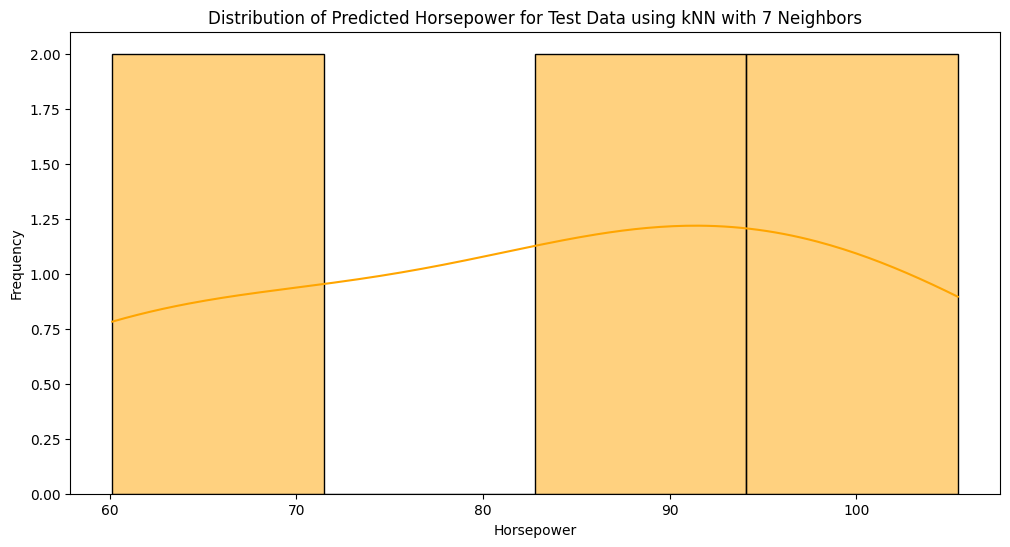

In [24]:
# Create the kNN model with 7 neighbors
knn_model_7 = KNeighborsRegressor(n_neighbors=7)

# Train the model on the combined dataset
knn_model_7.fit(X_combined, y_combined)

# Predict the horsepower for the test data
knn_test_predictions_7 = knn_model_7.predict(X_test)

# Evaluate the predictions
test_data['knn_predicted_horsepower_7'] = knn_test_predictions_7

# Print the predicted values
print("Predicted Horsepower for Test Data using kNN with 7 neighbors:\n", test_data[['name', 'knn_predicted_horsepower_7']])

# Visualize the predicted values
plt.figure(figsize=(12, 6))
sns.histplot(knn_test_predictions_7, kde=True, color='orange')
plt.title('Distribution of Predicted Horsepower for Test Data using kNN with 7 Neighbors')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

# 1

In [37]:
heart_dataset = pd.read_csv('/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/Data/Heart.csv')
heart_dataset.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Preprocess the data
heart_dataset = heart_dataset.drop(columns=['Unnamed: 0'])
heart_dataset = pd.get_dummies(heart_dataset, drop_first=True)

# Select features and target variable
features = heart_dataset.drop(columns=['AHD_Yes'])
target = heart_dataset['AHD_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.83      0.81        29
        True       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

